# 미세 튜닝 모델 검증

In [86]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import transformers
import os

In [2]:
# Set device
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
torch_dtype = torch.float16 if device == "cuda" else torch.float32

In [3]:
print(device)

cuda


# Text2Image

In [4]:
import torch
from diffusers import StableDiffusionPipeline, UNet2DConditionModel

# 미세 튜닝된 UNet2DConditionModel
# model_path = "/Volumes/jmoh2T/models/sd-foodai-model-ko" # 맥북
model_path = "/Jupyter/models/sd-foodai-model-ko" # 연구실 머신
unet = UNet2DConditionModel.from_pretrained(model_path + "/checkpoint-180000/unet", torch_dtype=torch_dtype)

# 원본 파이프라인
# initial_pipeline_path = "/Volumes/jmoh2T/models/initial-ai-menu-stable-diffusion-v1-4" # 맥북
initial_pipeline_path = "/Jupyter/models/initial-ai-menu-stable-diffusion-v1-4" # 연구실 머신
pipe = StableDiffusionPipeline.from_pretrained(initial_pipeline_path, unet=unet, torch_dtype=torch_dtype)

# trained_pipeline_path = "/Volumes/jmoh2T/models/ai-menu-model-v1-4"
# pipe = StableDiffusionPipeline.from_pretrained(trained_pipeline_path, torch_dtype=torch_dtype)

pipe.to(device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "/Jupyter/models/initial-ai-menu-stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [7]:
# Load the pipeline
# model_id_or_path = "CompVis/stable-diffusion-v1-4"
model_id_or_path = "Bingsu/my-korean-stable-diffusion-v1-5"
original_pipe = StableDiffusionPipeline.from_pretrained(model_id_or_path, torch_dtype=torch_dtype).to(device)

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [77]:
# prompt = "Seafood hot pot, as if it's being served in a Korean restaurant"
prompt = "소고기 김밥"
# prompt = "함흥냉면, 젓가락 제외"
# prompt = "Songpyeon (half-moon shaped rice cake), Korean style, photographed from directly above"
# prompt = 'Small clams, steamed, photographed from directly above'
# prompt = "Roasted seaweed, Korean style, photographed from directly above"
# prompt = 'Tteokbokki (spicy rice cakes) with a half of boiled egg on it, which is Korean street food, photographed from directly above'
# prompt = "식탁위 한가운데, 구운 찰옥수수, 케첩"
# prompt = "Ramyeon (Korean instant noodles), photographed from directly above"
# prompt = "Kimchi soup, photographed from directly above, without chopsticks"
# prompt = "Naengmyeon (cold noodles) with a cup of coffe at left side, photographed from directly above"
# prompt = "Korean favoriate food called 'Chicken feet' with hot source, unurgly, photographed from directly above" # 혐오
# 
# prompt = "Spicy pork bulgogi, a food which is photographed from directly above"

  0%|          | 0/35 [00:00<?, ?it/s]

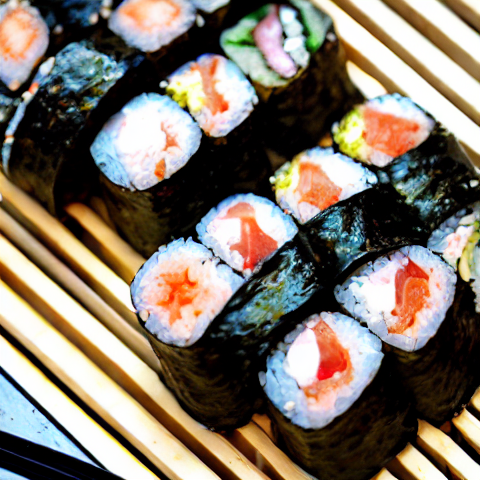

In [78]:
generator = torch.Generator(device=device).manual_seed(42)
pipe(prompt=prompt,
    # negative_prompt="chinese food", # Negative prompt to avoid
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
    ).images[0]

  0%|          | 0/35 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


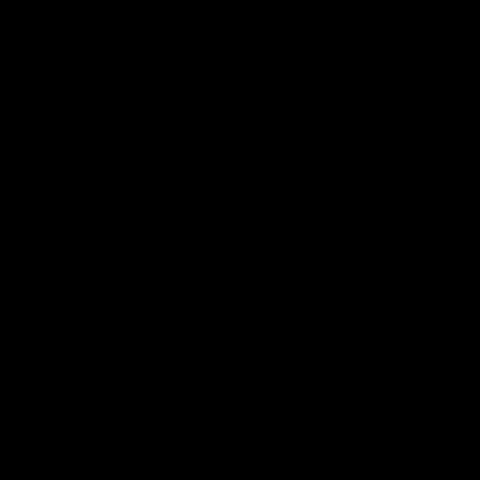

In [10]:
generator = torch.Generator(device=device).manual_seed(42)
original_pipe(prompt=prompt, 
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
    ).images[0]

# 파이프라인 저장

In [82]:
model_id = "foodai-pipeline-ko"
# pipe.save_pretrained("/Volumes/jmoh2T/models/ai-menu-model-v1-4") # 맥북
pipe.save_pretrained(f"/Jupyter/models/{model_id}") # 연구실 머신

## 허브 업로드 대응

In [85]:
from huggingface_hub import create_repo, upload_folder
from diffusers.utils.hub_utils import load_or_create_model_card, populate_model_card

In [83]:
repo_id = create_repo(
    repo_id=model_id,
    exist_ok=True,
).repo_id

In [89]:
def save_model_card(
    repo_id: str,
    repo_folder: str = None,
    pretrained_model_name_or_path: str = "CompVis/stable-diffusion-v1-4",
    pretrained_text_encoder_name_or_path: str = "Bingsu/my-korean-stable-diffusion-v1-5"
):

    model_description = f"""
# Text-to-image finetuning - {repo_id}

This pipeline was finetuned from **{pretrained_model_name_or_path}** with replacement of text encoder **{pretrained_text_encoder_name_or_path}** on the **AI-HUB: 건강관리를 위한 음식 이미지** dataset.

## Pipeline usage

You can use the pipeline like so:

```python
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("{repo_id}", torch_dtype=torch.float16)
prompt = "해물 짬뽕"
image = pipeline(prompt).images[0]
image.save("my_image.png")
```

## Training info

These are the key hyperparameters used during training:

* Epochs: 1
* Learning rate: 1e-05
* Batch size: 8
* Gradient accumulation steps: 4
* Image resolution:512
* Mixed-precision: bf16

"""

    model_card = load_or_create_model_card(
        repo_id_or_path=repo_id,
        from_training=True,
        license="creativeml-openrail-m",
        base_model=pretrained_model_name_or_path,
        model_description=model_description,
        inference=True,
    )

    tags = [
        "stable-diffusion",
        "stable-diffusion-diffusers",
        "text-to-image",
        "diffusers",
        "diffusers-training",
    ]
    model_card = populate_model_card(model_card, tags=tags)

    model_card.save(os.path.join(repo_folder, "README.md"))

In [90]:
save_model_card(repo_id=repo_id, repo_folder=f"/Jupyter/models/{model_id}")

In [91]:
upload_folder(
    repo_id=repo_id,
    folder_path=f"/Jupyter/models/{model_id}",
    commit_message="End of training",
    ignore_patterns=["step_*", "epoch_*"],
)

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jangmin/foodai-pipeline-ko/commit/acb0c84da27bb4a168ac431fa4d7455f531f54b7', commit_message='End of training', commit_description='', oid='acb0c84da27bb4a168ac431fa4d7455f531f54b7', pr_url=None, pr_revision=None, pr_num=None)